In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import sweetviz

In [2]:
!pip install sweetviz

## 1. Import a 311 NYC service request.

In [3]:
# import a 311 NYC service request
Customer_data=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
Customer_data=Customer_data.copy()

C:\Users\91808\AppData\Local\Temp\ipykernel_26432\608672552.py:2: DtypeWarning: Columns (17,31) have mixed types. Specify dtype option on import or set low_memory=False.
  Customer_data=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")


In [4]:
Customer_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,36573746,6/29/2017 10:30,6/29/2017 10:50,DOT,Department of Transportation,Traffic Signal Condition,LED Pedestrian Unit,NaN,11216.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.680050,-73.943262,"(40.680049857476014, -73.94326223933436)"
1,36573747,6/29/2017 10:03,8/10/2017 11:04,DOF,Personal Exemption Unit,DOF Property - Reduction Issue,Personal STAR Exemption,"1-, 2- and 3- Family Home",11417.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36573748,6/29/2017 11:08,8/10/2017 12:21,DOF,Personal Exemption Unit,DOF Property - Reduction Issue,Personal STAR Exemption,Co-Op Unit,11362.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36573749,6/29/2017 15:46,6/29/2017 20:01,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10306.0,130 LINCOLN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.579065,-74.108113,"(40.57906513842802, -74.10811287953392)"
4,36573750,6/29/2017 2:36,6/29/2017 5:59,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11233.0,BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674128,-73.913919,"(40.6741276342012, -73.91391853139783)"


In [5]:
Customer_data.shape

(1048575, 41)

In [6]:
##we checking missing values in each column

def missing_values_table(Customer_data):
    mis_val = Customer_data.isnull().sum()
    mis_val_percent = 100 * Customer_data.isnull().sum() / len(Customer_data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', 
    ascending=False).round(1)
    print("Your selected dataframe has " + str(Customer_data.shape[1]) + " columns.\n"
         "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    return mis_val_table_ren_columns


In [7]:
missing_values_table(Customer_data)

Your selected dataframe has 41 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values
Vehicle Type,1048562,100.0
Landmark,1048203,100.0
Taxi Company Borough,1047621,99.9
Road Ramp,1047196,99.9
Bridge Highway Name,1047172,99.9
Bridge Highway Direction,1047172,99.9
Bridge Highway Segment,1046784,99.8
Taxi Pick Up Location,1044115,99.6
Intersection Street 2,906684,86.5
Intersection Street 1,905851,86.4


In [8]:
Customer_data = Customer_data.drop(['Bridge Highway Name', 
                                    'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 
                                     'Landmark'],axis=1)


In [9]:
Customer_data.shape

(1048575, 36)

## 2.Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [10]:
Customer_data['Created Date'] = pd.to_datetime(Customer_data['Created Date'])
Customer_data['Closed Date']=pd.to_datetime(Customer_data['Closed Date'])

In [11]:
Customer_data.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Facility Type                             object
Status                                    object
Due Date                                  object
Resolution Descripti

## Create a new column' Request closing time'

In [12]:
from datetime import timedelta

# Calculate the time taken to close each request
Customer_data['Request_Closing_Time'] = (Customer_data['Closed Date'] - Customer_data['Created Date'])

# Print the first five rows of the 'Request_Closing_Time' column
print(Customer_data['Request_Closing_Time'].head())


0    0 days 00:20:00
1   42 days 01:01:00
2   42 days 01:13:00
3    0 days 04:15:00
4    0 days 03:23:00
Name: Request_Closing_Time, dtype: timedelta64[ns]


In [13]:
from datetime import timedelta

# function to convert Timedelta to hours
def hours(timeDel):
    days = timeDel.days
    hours = round(timeDel.seconds/3600, 2)
    result = (days * 24) + hours
    return result

# calculate Request_Closing_Time
Customer_data['Request_Closing_Time'] = Customer_data['Closed Date'] - Customer_data['Created Date']

# convert Request_Closing_Time to hours
Customer_data['Request_Closing_Hours'] = Customer_data['Request_Closing_Time'].apply(hours)

# print the first 10 rows of Request_Closing_Hours
print(Customer_data['Request_Closing_Hours'].head(10))


0       0.33
1    1009.02
2    1009.22
3       4.25
4       3.38
5      25.60
6      15.02
7       0.43
8      25.52
9       3.48
Name: Request_Closing_Hours, dtype: float64


In [14]:
import math

def hrstocat(hr):
    if (math.isnan(hr)):
        return 'Unspecified'
    elif (hr < 2.0):
        return 'Fast'
    elif (4.0 <= hr < 6.0):
        return 'Slow'
    else:
        return 'Very Slow'
        
# Testing function 
print(hrstocat(3.5))
        
# Create new column Request_Closing_Time_Category and apply function on column Request_Closing_Hours
Customer_data['Request_Closing_Time_Category'] = Customer_data['Request_Closing_Hours'].apply(hrstocat)
        
Customer_data['Request_Closing_Time_Category'].head()


Very Slow


0         Fast
1    Very Slow
2    Very Slow
3         Slow
4    Very Slow
Name: Request_Closing_Time_Category, dtype: object

In [15]:
barplot=Customer_data['Request_Closing_Time_Category'].value_counts()
barplot

Very Slow      748257
Fast           225999
Slow            52000
Unspecified     22319
Name: Request_Closing_Time_Category, dtype: int64

## 3.	Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

<AxesSubplot:>

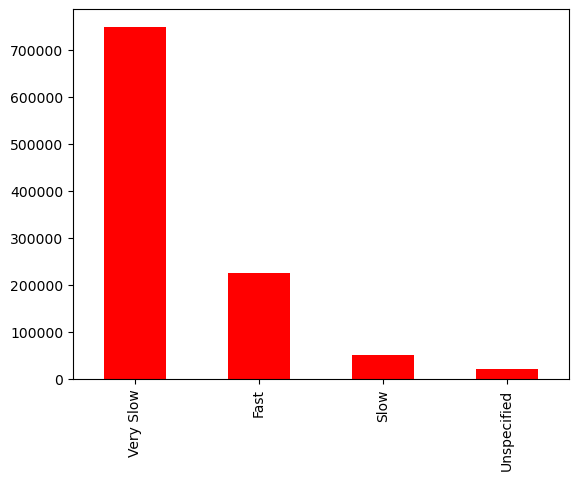

In [16]:
barplot.plot(kind='bar', color='r')  # 1conclusion- .most of the request closed very slow

In [17]:
Customer_data.groupby('Status').size()

Status
Assigned               8995
Closed              1017880
Closed - Testing          2
Draft                    10
Email Sent              412
In Progress               1
Open                  10306
Pending               10653
Started                 310
Unassigned                5
Unspecified               1
dtype: int64

<AxesSubplot:>

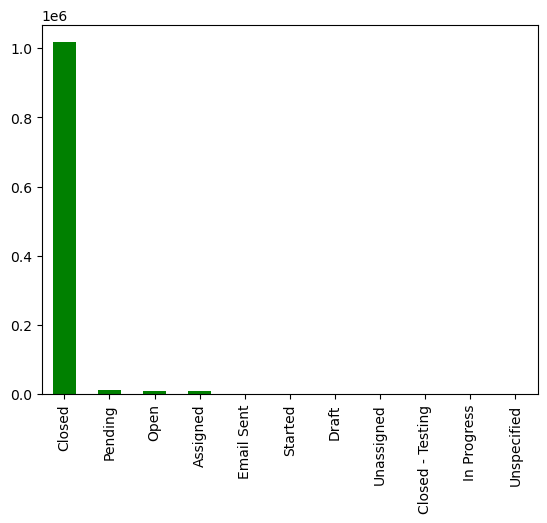

In [18]:
Customer_data['Status'].value_counts().plot.bar(color='g')
#2.conclusion- most of the request are already closed

In [19]:
Customer_data.groupby('Park Borough').size()

Park Borough
BRONX            183419
BROOKLYN         333028
MANHATTAN        200207
QUEENS           262608
STATEN ISLAND     55542
Unspecified       13469
dtype: int64

<AxesSubplot:>

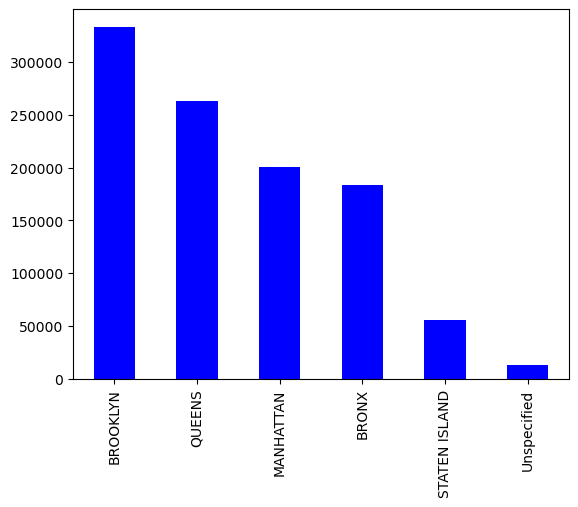

In [20]:
Customer_data['Park Borough'].value_counts().plot.bar(color='b')
#3 conclusion - the customer service request are ,much higher from the city brroklyn and queens

In [21]:
#created the series in the text format
monthSeries = pd.Series({1: 'Jan', 2: 'Feb', 3:'Mar', 4:'Apr', 5:'May',})

In [22]:
# create a series with month names
monthSeries = pd.Series({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# print the series
print(monthSeries)


1     Jan
2     Feb
3     Mar
4     Apr
5     May
6     Jun
7     Jul
8     Aug
9     Sep
10    Oct
11    Nov
12    Dec
dtype: object


In [23]:
import datetime

def getMonth(crDate):
    a = str(crDate)
    date1 = datetime.datetime.strptime(a, '%Y-%m-%d %H:%M:%S')
    return date1.strftime('%B')

#test function getmonth
print(Customer_data['Created Date'][1])
print(getMonth(Customer_data['Created Date'][1]))


2017-06-29 10:03:00
June


In [24]:
Customer_data['Created_month']=Customer_data['Created Date'].apply(getMonth)

In [25]:
Customer_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Hours,Request_Closing_Time_Category,Created_month
0,36573746,2017-06-29 10:30:00,2017-06-29 10:50:00,DOT,Department of Transportation,Traffic Signal Condition,LED Pedestrian Unit,NaN,11216.0,NaN,...,NaN,NaN,NaN,40.680050,-73.943262,"(40.680049857476014, -73.94326223933436)",0 days 00:20:00,0.33,Fast,June
1,36573747,2017-06-29 10:03:00,2017-08-10 11:04:00,DOF,Personal Exemption Unit,DOF Property - Reduction Issue,Personal STAR Exemption,"1-, 2- and 3- Family Home",11417.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42 days 01:01:00,1009.02,Very Slow,June
2,36573748,2017-06-29 11:08:00,2017-08-10 12:21:00,DOF,Personal Exemption Unit,DOF Property - Reduction Issue,Personal STAR Exemption,Co-Op Unit,11362.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42 days 01:13:00,1009.22,Very Slow,June
3,36573749,2017-06-29 15:46:00,2017-06-29 20:01:00,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10306.0,130 LINCOLN AVENUE,...,NaN,NaN,NaN,40.579065,-74.108113,"(40.57906513842802, -74.10811287953392)",0 days 04:15:00,4.25,Slow,June
4,36573750,2017-06-29 02:36:00,2017-06-29 05:59:00,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11233.0,BERGEN STREET,...,NaN,NaN,NaN,40.674128,-73.913919,"(40.6741276342012, -73.91391853139783)",0 days 03:23:00,3.38,Very Slow,June


<AxesSubplot:>

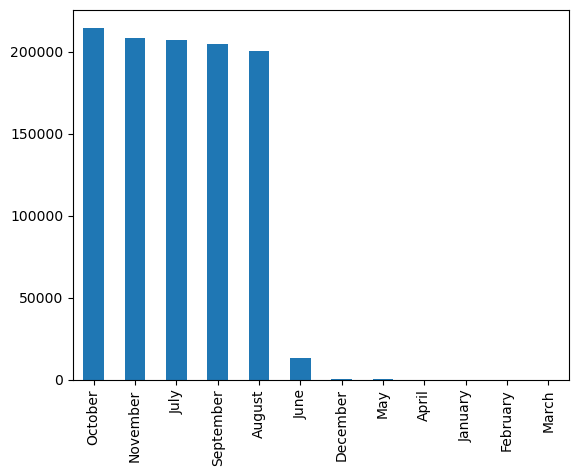

In [26]:
plot2=Customer_data['Created_month'].value_counts()
plot2.plot.bar()

In [27]:
## above plot shows max request are came in oct . and june to oct and not any req in 4 months

In [28]:
complaint_count = pd.crosstab(Customer_data['Complaint Type'],Customer_data['Complaint Type']).max().sort_values(ascending=False)
complaint_count

Complaint Type
Noise - Residential        100549
Illegal Parking             64570
Blocked Driveway            58623
HEAT/HOT WATER              54609
Noise - Street/Sidewalk     40648
                            ...  
NORC Complaint                  1
Advocate-Business Tax           1
Advocate - Lien                 1
ZSYSTEST                        1
ZTESTINT                        1
Length: 216, dtype: int64

In [29]:
complaint_counts = Customer_data['Complaint Type'].value_counts()
complaint_counts

Noise - Residential        100549
Illegal Parking             64570
Blocked Driveway            58623
HEAT/HOT WATER              54609
Noise - Street/Sidewalk     40648
                            ...  
Squeegee                        1
Advocate - Lien                 1
Advocate-Business Tax           1
VACANT APARTMENT                1
ZTESTINT                        1
Name: Complaint Type, Length: 216, dtype: int64

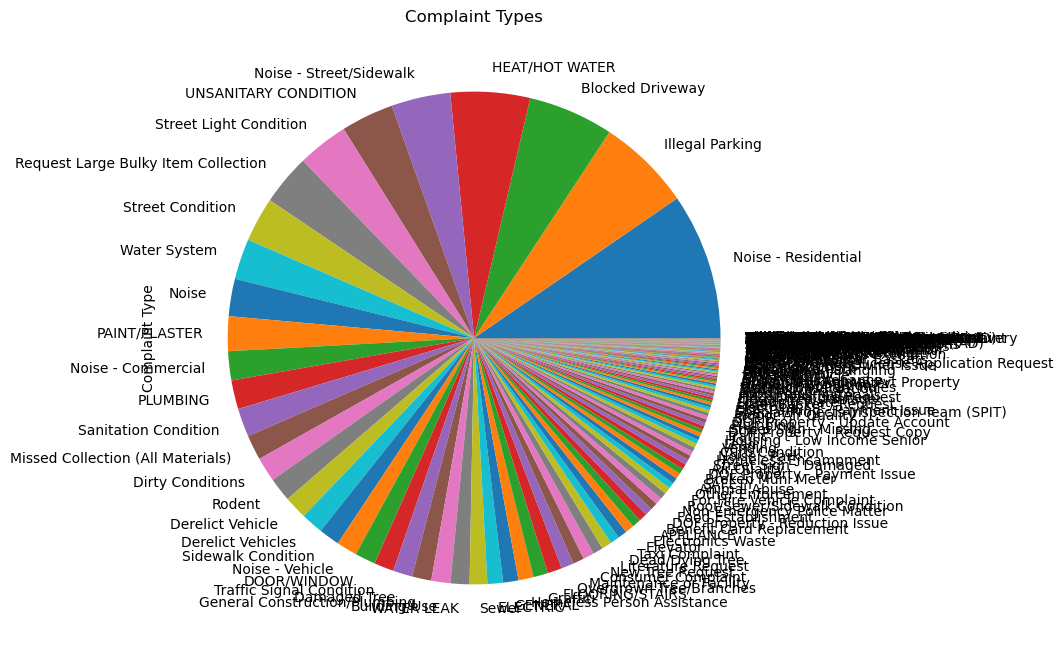

In [30]:
complaint_counts.plot.pie(figsize=(8, 8))
plt.title('Complaint Types')
plt.show()


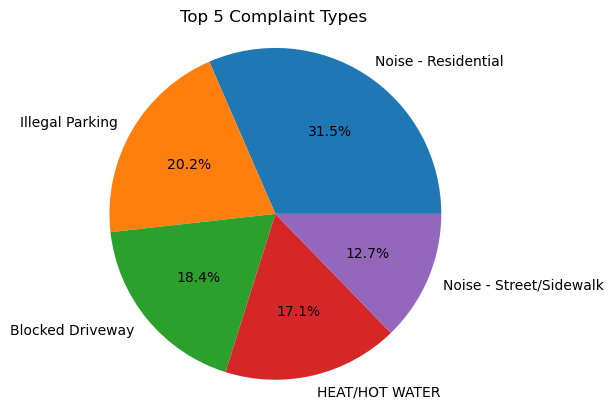

In [31]:

# Top five complaint types
complaint_counts = [100549, 64570, 58623, 54609, 40648]
complaint_types = ['Noise - Residential', 'Illegal Parking', 'Blocked Driveway', 'HEAT/HOT WATER', 'Noise - Street/Sidewalk']

# Calculate percentage of each complaint type
total_count = sum(complaint_counts)
complaint_percentages = [(count/total_count)*100 for count in complaint_counts]

# Plot pie chart
plt.pie(complaint_percentages, labels=complaint_types, autopct='%1.1f%%')
plt.title('Top 5 Complaint Types')
plt.axis('equal')
plt.show()


## 4.	Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

In [32]:
Customer_data['City'].isnull().sum()

39271

In [33]:
Customer_data['City'].fillna('Not specified', inplace=True)
Customer_data['City'].head()

0         BROOKLYN
1       OZONE PARK
2      LITTLE NECK
3    STATEN ISLAND
4         BROOKLYN
Name: City, dtype: object

In [34]:
Customer_data_grouped=Customer_data.groupby(['City', 'Complaint Type'])
Customer_data_grouped.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Hours,Request_Closing_Time_Category,Created_month
0,36573746,2017-06-29 10:30:00,2017-06-29 10:50:00,DOT,Department of Transportation,Traffic Signal Condition,LED Pedestrian Unit,NaN,11216.0,NaN,...,NaN,NaN,NaN,40.680050,-73.943262,"(40.680049857476014, -73.94326223933436)",0 days 00:20:00,0.33,Fast,June
1,36573747,2017-06-29 10:03:00,2017-08-10 11:04:00,DOF,Personal Exemption Unit,DOF Property - Reduction Issue,Personal STAR Exemption,"1-, 2- and 3- Family Home",11417.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42 days 01:01:00,1009.02,Very Slow,June
2,36573748,2017-06-29 11:08:00,2017-08-10 12:21:00,DOF,Personal Exemption Unit,DOF Property - Reduction Issue,Personal STAR Exemption,Co-Op Unit,11362.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42 days 01:13:00,1009.22,Very Slow,June
3,36573749,2017-06-29 15:46:00,2017-06-29 20:01:00,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10306.0,130 LINCOLN AVENUE,...,NaN,NaN,NaN,40.579065,-74.108113,"(40.57906513842802, -74.10811287953392)",0 days 04:15:00,4.25,Slow,June
4,36573750,2017-06-29 02:36:00,2017-06-29 05:59:00,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11233.0,BERGEN STREET,...,NaN,NaN,NaN,40.674128,-73.913919,"(40.6741276342012, -73.91391853139783)",0 days 03:23:00,3.38,Very Slow,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047368,37818129,2017-11-30 14:07:00,2017-12-05 14:59:00,DFTA,HealthCare Connections,Housing Options,Other Housing Options,Senior Address,11413.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5 days 00:52:00,120.87,Very Slow,November
1047464,37818240,2017-11-30 10:11:00,2017-12-01 12:00:00,DSNY,Department of Sanitation,Sweeping/Missed,3A Sweeping/Missed,Sidewalk,11375.0,NaN,...,NaN,NaN,NaN,40.721644,-73.838642,"(40.72164377166893, -73.83864174439586)",1 days 01:49:00,25.82,Very Slow,November
1047890,37818778,2017-11-30 09:33:00,NaT,DOHMH,Department of Health and Mental Hygiene,Indoor Sewage,Sewage Odor,1-2 Family Dwelling,11379.0,72-39 66 DRIVE,...,NaN,NaN,NaN,40.713533,-73.881342,"(40.713532772586056, -73.88134163851244)",NaT,NaN,Unspecified,November
1048419,37819424,2017-11-30 12:06:00,NaT,DOHMH,Department of Health and Mental Hygiene,Non-Residential Heat,Inadequate or No Heat,Building (Non-Residential),11418.0,134-20 87 AVENUE,...,NaN,NaN,NaN,40.704805,-73.820634,"(40.704805426806594, -73.82063448097111)",NaT,NaN,Unspecified,November


In [35]:
Customer_data.grouped=Customer_data.groupby(['City', 'Complaint Type']).agg({'Request_Closing_Hours':'mean'})
Customer_data.grouped

C:\Users\91808\AppData\Local\Temp\ipykernel_26432\2201312662.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Customer_data.grouped=Customer_data.groupby(['City', 'Complaint Type']).agg({'Request_Closing_Hours':'mean'})


Request_Closing_Hours
City    Complaint Type                                   
.       Broken Muni Meter                        469.4700
        Consumer Complaint                       373.8300
0       Taxi Complaint                           930.3000
0000    For Hire Vehicle Complaint               111.0300
A       Consumer Complaint                       227.6500
...                                                   ...
YONKERS Consumer Complaint                       300.3320
        For Hire Vehicle Complaint                    NaN
        Housing Options                          158.1750
        Taxi Complaint                           976.1625
        Taxi Report                                0.0000

[6019 rows x 1 columns]

In [36]:
Customer_data.grouped['Request_Closing_Hours'].isnull().sum()

329

In [37]:
Customer_data.grouped_dropna=Customer_data.grouped['Request_Closing_Hours'].dropna()
Customer_data.grouped_dropna

C:\Users\91808\AppData\Local\Temp\ipykernel_26432\3926709725.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Customer_data.grouped_dropna=Customer_data.grouped['Request_Closing_Hours'].dropna()


City      Complaint Type            
.         Broken Muni Meter             469.470000
          Consumer Complaint            373.830000
0         Taxi Complaint                930.300000
0000      For Hire Vehicle Complaint    111.030000
A         Consumer Complaint            227.650000
                                           ...    
Woodside  Water System                  453.866667
YONKERS   Consumer Complaint            300.332000
          Housing Options               158.175000
          Taxi Complaint                976.162500
          Taxi Report                     0.000000
Name: Request_Closing_Hours, Length: 5690, dtype: float64

In [38]:
Customer_data_sort=Customer_data.sort_values(['City', 'Request_Closing_Hours'])
Customer_data_sort.head(30)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Hours,Request_Closing_Time_Category,Created_month
281455,36914378,2017-08-10 11:16:00,2017-08-26 01:06:00,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,0.0,00,...,NaN,NaN,NaN,NaN,NaN,NaN,15 days 13:50:00,373.83,Very Slow,August
270226,36900992,2017-08-08 17:56:00,2017-08-28 07:24:00,DOT,Department of Transportation,Broken Muni Meter,No Receipt,Street,NaN,. METROPOLITAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,19 days 13:28:00,469.47,Very Slow,August
628014,37324402,2017-10-01 15:27:00,2017-11-09 09:45:00,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,38 days 18:18:00,930.30,Very Slow,October
331864,36974360,2017-08-19 01:10:00,2017-08-23 16:12:00,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Driver Complaint,Street,0.0,0000,...,NaN,NaN,NaN,NaN,NaN,NaN,4 days 15:02:00,111.03,Very Slow,August
863281,37603836,2017-11-04 18:07:00,2017-11-08 11:04:00,DCA,Department of Consumer Affairs,Consumer Complaint,Damaged Vehicle,NaN,NaN,A A,...,NaN,NaN,NaN,NaN,NaN,NaN,3 days 16:57:00,88.95,Very Slow,November
903517,37650790,2017-11-09 18:45:00,2017-11-25 01:06:00,DCA,Department of Consumer Affairs,Consumer Complaint,Damaged/Defective Goods,NaN,NaN,A A,...,NaN,NaN,NaN,NaN,NaN,NaN,15 days 06:21:00,366.35,Very Slow,November
130943,36732960,2017-07-18 06:05:00,2017-08-25 15:34:00,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,NaN,11507.0,6 MORLEY COURT,...,NaN,NaN,La Guardia Airport,NaN,NaN,NaN,38 days 09:29:00,921.48,Very Slow,July
208613,36826541,2017-07-30 20:34:00,2017-08-16 11:26:00,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,18104.0,4000 DORNEY PARK ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,16 days 14:52:00,398.87,Very Slow,July
611836,37305595,2017-09-28 10:39:00,2017-09-29 13:04:00,DCA,Department of Consumer Affairs,Consumer Complaint,Damaged Vehicle,NaN,11701.0,67 ALBANY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,1 days 02:25:00,26.42,Very Slow,September
54534,36639949,2017-07-07 16:20:00,2017-07-27 16:04:00,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,NaN,NaN,ANON ANON,...,NaN,NaN,New York-Penn Station,NaN,NaN,NaN,19 days 23:44:00,479.73,Very Slow,July


## 5.	Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

### 1. Whether the average response time across complaint types is similar or not (overall)

#### HO= the average respnse time across complaint types is similas H1 =Not similar

In [39]:
import scipy.stats as st
import math

In [40]:
Customer_data['Complaint Type'].value_counts()


Noise - Residential        100549
Illegal Parking             64570
Blocked Driveway            58623
HEAT/HOT WATER              54609
Noise - Street/Sidewalk     40648
                            ...  
Squeegee                        1
Advocate - Lien                 1
Advocate-Business Tax           1
VACANT APARTMENT                1
ZTESTINT                        1
Name: Complaint Type, Length: 216, dtype: int64

In [41]:
Top6_complaints_type=Customer_data['Complaint Type'].value_counts()[:6]
Top6_complaints_type

Noise - Residential        100549
Illegal Parking             64570
Blocked Driveway            58623
HEAT/HOT WATER              54609
Noise - Street/Sidewalk     40648
UNSANITARY CONDITION        36288
Name: Complaint Type, dtype: int64

In [42]:
Top6_complaints_type_names=Top6_complaints_type.index
Top6_complaints_type_names

Index(['Noise - Residential', 'Illegal Parking', 'Blocked Driveway',
       'HEAT/HOT WATER', 'Noise - Street/Sidewalk', 'UNSANITARY CONDITION'],
      dtype='object')

In [48]:
data = Customer_data.loc[Customer_data['Complaint Type'].isin(Top6_complaints_type_names), ['Complaint Type', 'Request_Closing_Hours']]
data.head(10)


,Complaint Type,Request_Closing_Hours
4,Noise - Residential,3.38
42,Noise - Residential,0.22
63,Illegal Parking,1.32
64,Illegal Parking,2.62
68,Noise - Residential,0.38
69,Illegal Parking,1.62
70,Illegal Parking,0.18
71,Illegal Parking,2.45
72,Illegal Parking,16.73
74,Illegal Parking,6.20


In [50]:
data.isnull().sum()

Complaint Type             0
Request_Closing_Hours    630
dtype: int64

In [51]:
data.dropna(how='any', inplace=True)
data.isnull().sum()

Complaint Type           0
Request_Closing_Hours    0
dtype: int64

In [52]:
s1 = data[data['Complaint Type'] == Top6_complaints_type_names[1]].Request_Closing_Hours
s1.head()

63    1.32
64    2.62
69    1.62
70    0.18
71    2.45
Name: Request_Closing_Hours, dtype: float64

In [53]:
s2 = data[data['Complaint Type'] == Top6_complaints_type_names[2]].Request_Closing_Hours
s2.head()

94      8.43
718     0.37
721    11.23
722     3.20
723     3.75
Name: Request_Closing_Hours, dtype: float64

In [54]:
s3 = data[data['Complaint Type'] == Top6_complaints_type_names[3]].Request_Closing_Hours
s3.head()

348    101.57
360     91.60
374     76.50
380     26.30
382     96.53
Name: Request_Closing_Hours, dtype: float64

In [55]:
st.f_oneway(s1,s2,s3)  #anova test

F_onewayResult(statistic=7701.39931254945, pvalue=0.0)

##### as we can see p values is less than 0.05 so we reject null hypothesis and average time is not same

### 2.are the type of complaint or service requested and location related?

### H0: 2 categories = cpmplaint type and location is independent means not related

### H1:2 categories= complaint type and location is dependent means related

In [56]:
top5_location = Customer_data['City'].value_counts()[:5]
top5_location

BROOKLYN         327205
NEW YORK         192796
BRONX            176440
STATEN ISLAND     55083
Not specified     39271
Name: City, dtype: int64

In [57]:
top5_location_names=top5_location.index
top5_location_names

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'Not specified'], dtype='object')

In [59]:
data2 = Customer_data.loc[(Customer_data['Complaint Type'].isin(Top6_complaints_type_names)) & (Customer_data['City'].isin(top5_location_names)), ['Complaint Type', 'City']]
data2.head()


,Complaint Type,City
4,Noise - Residential,BROOKLYN
42,Noise - Residential,BROOKLYN
63,Illegal Parking,STATEN ISLAND
68,Noise - Residential,NEW YORK
69,Illegal Parking,BROOKLYN


In [60]:
chi_test=pd.crosstab(data2['Complaint Type'], data2['City'], margins=True)
chi_test

City,BRONX,BROOKLYN,NEW YORK,Not specified,STATEN ISLAND,All
Complaint Type,,,,,,
Blocked Driveway,10486,21045,1586,276,1608,35001
HEAT/HOT WATER,15960,17814,12007,12,570,46363
Illegal Parking,7341,24319,8984,198,3552,44394
Noise - Residential,23359,31100,20049,176,3245,77929
Noise - Street/Sidewalk,8425,11979,15397,85,493,36379
UNSANITARY CONDITION,10923,12456,6714,12,921,31026
All,76494,118713,64737,759,10389,271092


In [61]:
ch2, p_value, df, exp_frq = st.chi2_contingency(chi_test) #chi square test

In [62]:
print(ch2)
print(p_value)

24046.834965737075
0.0


## We can see p value is less than 0.05 so we reject the null hypothesis means Complaint type and locations is dependent